In [17]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [18]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset

--2023-10-01 11:56:41--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2023-10-01 11:56:41 (11.1 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [19]:
X = dataset.drop(columns=['expenses'])  # Features
y = dataset['expenses']  # Target

In [20]:
# Preprocess categorical features
categorical_columns = ['sex', 'smoker', 'region']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = Sequential()
model.add(Dense(8192, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8192, activation='relu'))
model.add(Dense(1))  # Output layer for regression task
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              57344     
                                                                 
 dense_4 (Dense)             (None, 8192)              67117056  
                                                                 
 dense_5 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 67182593 (256.28 MB)
Trainable params: 67182593 (256.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, epochs=10)

Epoch 1/10
34/34 - 2s - loss: 10506.8955 - mean_absolute_error: 10506.8955 - mean_squared_error: 243500240.0000 - val_loss: 6138.3428 - val_mean_absolute_error: 6138.3428 - val_mean_squared_error: 124025088.0000 - 2s/epoch - 60ms/step
Epoch 2/10
34/34 - 1s - loss: 4573.2290 - mean_absolute_error: 4573.2290 - mean_squared_error: 77317464.0000 - val_loss: 3588.2341 - val_mean_absolute_error: 3588.2341 - val_mean_squared_error: 45490324.0000 - 806ms/epoch - 24ms/step
Epoch 3/10
34/34 - 1s - loss: 3604.3279 - mean_absolute_error: 3604.3279 - mean_squared_error: 44509372.0000 - val_loss: 3409.3462 - val_mean_absolute_error: 3409.3462 - val_mean_squared_error: 34148876.0000 - 886ms/epoch - 26ms/step
Epoch 4/10
34/34 - 1s - loss: 3318.7673 - mean_absolute_error: 3318.7673 - mean_squared_error: 38617904.0000 - val_loss: 2988.9617 - val_mean_absolute_error: 2988.9617 - val_mean_squared_error: 31189486.0000 - 848ms/epoch - 25ms/step
Epoch 5/10
34/34 - 1s - loss: 3088.9492 - mean_absolute_error: 

9/9 - 0s - loss: 2332.6824 - mean_absolute_error: 2332.6824 - mean_squared_error: 23932616.0000 - 47ms/epoch - 5ms/step
Testing set Mean Abs Error: 2332.68 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


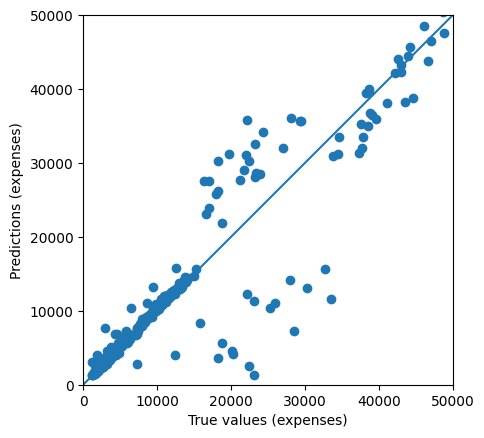

In [25]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
